In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

In [3]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


<AxesSubplot: >

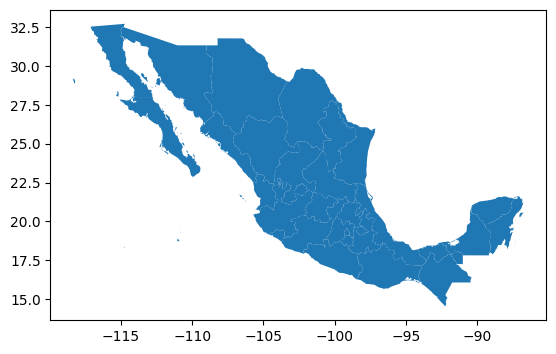

In [4]:
#plt.grid()
geo_df.plot()

In [5]:
data_path = os.getcwd()+ '/Data/Temp/2013/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['201301010000TMed.csv', '201302010000TMed.csv', '201303010000TMed.csv', '201304010000TMed.csv', '201305010000TMed.csv', '201306010000TMed.csv', '201307010000TMed.csv', '201308010000TMed.csv', '201309010000TMed.csv', '201310010000TMed.csv', '201311010000TMed.csv', '201312010000TMed.csv']


In [6]:
path = os.getcwd()+ '/Data/Temp/2013/'
all_files = glob.glob(path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201301010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201302010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201303010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201304010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201305010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201306010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201307010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201308010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201309010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201310010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2013\\201311010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Es

In [7]:
#dfPrueba=[df1,df2]
li = []
TMed = ['TMed201301','TMed201302','TMed201303','TMed201304','TMed201305','TMed201306','TMed201307','TMed201308','TMed201309',
        'TMed201310','TMed201311','TMed201312' ]

In [8]:
for i in range(len(TMed)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df = df.rename(columns={'Tmed':TMed[i]})
    li.append(df)
    
li[0].head()

,Lon,Lat,Clave,Edo,Est,TMed201301
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9
3,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1
4,-105.35,22.49,ACANR,NAY,"Acaponeta, Nay.",22.3


In [9]:
d1=li[0]
d2=li[1]
d3=li[2]
d4=li[3]
d5=li[4]
d6=li[5]
d7=li[6]
d8=li[7]
d9=li[8]
d10=li[9]
d11=li[10]
d12=li[11]
#len(d1),len(d2)

In [10]:
df_outer = pd.merge(d1,d2,
              on=['Clave','Lon','Lat','Est','Edo'], how='outer')

df_outer = pd.merge(df_outer , d3, on=['Clave','Lon','Lat','Est','Edo'], how='outer')

#pd.concat(li,axis=0,ignore_index=True)
df_outer.head()

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4,19.9,19.5
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9,24.4,24.6
3,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1,26.5,27.3
4,-105.35,22.49,ACANR,NAY,"Acaponeta, Nay.",22.3,22.8,23.3


In [11]:
from functools import reduce
dfl=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Clave','Lon','Lat','Est','Edo'],
                                            how='outer'), dfl)

df_merged

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,25.3,24.3,25.2,23.9,23.8,NaN,21.4
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4,19.9,19.5,24.2,24.8,23.8,21.9,21.5,21.0,20.7,NaN,17.2
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9,24.4,24.6,28.4,28.3,27.0,26.8,26.8,25.6,25.8,NaN,22.6
3,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1,26.5,27.3,27.7,28.2,28.8,28.5,28.2,27.2,28.0,NaN,NaN
4,-105.35,22.49,ACANR,NAY,"Acaponeta, Nay.",22.3,22.8,23.3,25.2,27.4,29.8,29.1,29.0,28.3,29.5,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-99.32,25.73,PCUNL,NL,PRESA EL CUCHILLO NL (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,NaN
2031,-96.50,15.67,PUAOX,OAX,PUERTO ANGEL OAX (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,NaN
2032,-87.47,20.13,SIAQR,QROO,SIAN KAAN QROO. (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.7,NaN
2033,-97.39,19.89,TEZIUTLAN,PUE,TEZIUTLAN PUE. AUTOMATICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,NaN


In [12]:
df_merged = df_merged.drop(2034)

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2033
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lon         2034 non-null   float64
 1   Lat         2034 non-null   float64
 2   Clave       2034 non-null   object 
 3   Edo         2034 non-null   object 
 4   Est         2034 non-null   object 
 5   TMed201301  939 non-null    float64
 6   TMed201302  949 non-null    float64
 7   TMed201303  886 non-null    float64
 8   TMed201304  948 non-null    float64
 9   TMed201305  946 non-null    float64
 10  TMed201306  963 non-null    float64
 11  TMed201307  967 non-null    float64
 12  TMed201308  965 non-null    float64
 13  TMed201309  957 non-null    float64
 14  TMed201310  956 non-null    float64
 15  TMed201311  1051 non-null   float64
 16  TMed201312  889 non-null    float64
dtypes: float64(14), object(3)
memory usage: 286.0+ KB


In [14]:
cols = ["TMed201301","TMed201302","TMed201303","TMed201304","TMed201305","TMed201306","TMed201307","TMed201308",
       "TMed201309","TMed201310","TMed201311","TMed201312"]
df_merged['TMed'] = df_merged[cols].mean(axis=1)
df_merged

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312,TMed
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,25.3,24.3,25.2,23.9,23.8,NaN,21.4,23.570000
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4,19.9,19.5,24.2,24.8,23.8,21.9,21.5,21.0,20.7,NaN,17.2,21.081818
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9,24.4,24.6,28.4,28.3,27.0,26.8,26.8,25.6,25.8,NaN,22.6,25.745455
3,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1,26.5,27.3,27.7,28.2,28.8,28.5,28.2,27.2,28.0,NaN,NaN,27.750000
4,-105.35,22.49,ACANR,NAY,"Acaponeta, Nay.",22.3,22.8,23.3,25.2,27.4,29.8,29.1,29.0,28.3,29.5,NaN,25.0,26.518182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,-101.46,20.32,MKZMC,MICH,MARKAZUZA AUTOMATICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,NaN,18.600000
2030,-99.32,25.73,PCUNL,NL,PRESA EL CUCHILLO NL (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,NaN,17.500000
2031,-96.50,15.67,PUAOX,OAX,PUERTO ANGEL OAX (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,NaN,27.500000
2032,-87.47,20.13,SIAQR,QROO,SIAN KAAN QROO. (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.7,NaN,25.700000


In [15]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Lon, df_merged.Lat), crs="EPSG:4326")
geo_df1

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312,TMed,geometry
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,25.3,24.3,25.2,23.9,23.8,NaN,21.4,23.570000,POINT (-89.68000 20.65000)
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4,19.9,19.5,24.2,24.8,23.8,21.9,21.5,21.0,20.7,NaN,17.2,21.081818,POINT (-101.54000 20.45000)
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9,24.4,24.6,28.4,28.3,27.0,26.8,26.8,25.6,25.8,NaN,22.6,25.745455,POINT (-92.80000 16.55000)
3,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1,26.5,27.3,27.7,28.2,28.8,28.5,28.2,27.2,28.0,NaN,NaN,27.750000,POINT (-99.91000 16.85000)
4,-105.35,22.49,ACANR,NAY,"Acaponeta, Nay.",22.3,22.8,23.3,25.2,27.4,29.8,29.1,29.0,28.3,29.5,NaN,25.0,26.518182,POINT (-105.35000 22.49000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,-101.46,20.32,MKZMC,MICH,MARKAZUZA AUTOMATICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,NaN,18.600000,POINT (-101.46000 20.32000)
2030,-99.32,25.73,PCUNL,NL,PRESA EL CUCHILLO NL (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,NaN,17.500000,POINT (-99.32000 25.73000)
2031,-96.50,15.67,PUAOX,OAX,PUERTO ANGEL OAX (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,NaN,27.500000,POINT (-96.50000 15.67000)
2032,-87.47,20.13,SIAQR,QROO,SIAN KAAN QROO. (EHCA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.7,NaN,25.700000,POINT (-87.47000 20.13000)


In [16]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')
intersect

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.68000 20.65000)
1,-89.22,19.88,BECYC,YUC,"Becanchén, Yuc.",19.7,21.1,20.1,24.2,24.5,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.22000 19.88000)
2,-89.08,20.46,CANYC,YUC,"Cantamayec, Yuc.",24.5,26.1,25.0,29.6,29.8,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.08000 20.46000)
3,-87.86,20.72,CATYC,YUC,"Catzín, Yuc.",23.9,25.0,24.6,29.0,29.1,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-87.86000 20.72000)
4,-88.47,20.39,CHIYC,YUC,"Chan Chichimilá, Yuc.",22.9,23.7,23.0,27.3,27.7,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-88.47000 20.39000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-98.23,19.32,TLAXCALAOB,TLAX,OBSERVATORIO TLAXCALA,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.23000 19.32000)
2003,-98.20,19.55,SJATL,TLAX,SAN JOSE ATLANGA,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.20000 19.55000)
2004,-98.24,19.31,76683,TLAX,TLAXCALA,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.24000 19.31000)
2005,-98.23,19.32,76684,TLAX,Tlaxcala (Automatica),NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.23000 19.32000)


In [17]:
grouped = intersect.groupby(['id','state'])['TMed'].agg('mean')
grouped.head()

id  state              
1   Aguascalientes         17.126014
2   Baja California        19.037256
3   Baja California Sur    22.737449
4   Campeche               26.604187
5   Chiapas                24.792015
Name: TMed, dtype: float64

In [18]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'TMed': 'TMed13'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,TMed13
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",17.126014
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",19.037256
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",22.737449
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",26.604187
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",24.792015


In [19]:
merge['TMed13'].max()
merge['TMed13'].min()

14.495218855218853

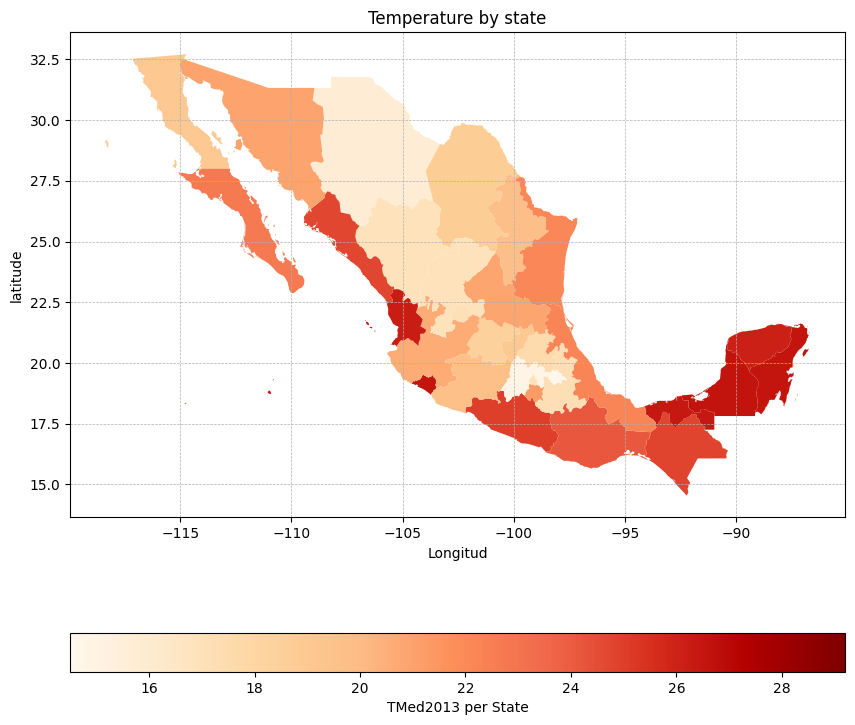

In [20]:
import matplotlib.pyplot as plt

merge.plot(column='TMed13', figsize=(10,10),
           legend_kwds={'label': "TMed2013 per State", 'orientation': "horizontal"}, legend=True, cmap='OrRd',vmin=14.5, vmax=29.2)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Longitud")
plt.ylabel("latitude")
plt.title("Temperature by state")
plt.savefig("TMed2013")


# Analisis por mes

Agrupar la tabla merge con los meses e identificador por estado

In [21]:
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
grouped2.head()

,,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312
id,state,,,,,,,,,,,,
1,Aguascalientes,12.938095,15.090909,15.738095,19.245455,21.195455,22.009091,19.768182,19.931818,19.409524,18.118182,16.129412,13.131818
2,Baja California,12.754545,13.891667,16.611111,19.207692,21.700000,25.070000,25.616667,24.516667,25.545455,20.175000,18.100000,14.554545
3,Baja California Sur,16.973684,17.271429,20.710526,21.327273,23.986364,27.065000,28.772727,29.290476,27.966667,25.095455,22.064000,18.954545
4,Campeche,23.450000,25.100000,25.375000,28.957143,29.360000,27.985714,27.786667,27.878571,27.213333,27.106667,26.406250,25.053333
5,Chiapas,23.459524,24.779545,24.905000,27.715909,27.475556,26.535556,26.117778,26.184444,25.706818,25.840476,23.936000,22.906452


In [22]:
dfAñoMes2013 = pd.merge(merge, grouped2, on="id")
dfAñoMes2013

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,15.738095,19.245455,21.195455,22.009091,19.768182,19.931818,19.409524,18.118182,16.129412,13.131818
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,16.611111,19.207692,21.700000,25.070000,25.616667,24.516667,25.545455,20.175000,18.100000,14.554545
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,20.710526,21.327273,23.986364,27.065000,28.772727,29.290476,27.966667,25.095455,22.064000,18.954545
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,25.375000,28.957143,29.360000,27.985714,27.786667,27.878571,27.213333,27.106667,26.406250,25.053333
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,24.905000,27.715909,27.475556,26.535556,26.117778,26.184444,25.706818,25.840476,23.936000,22.906452
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,16.297059,19.208824,22.188235,27.388571,24.808571,24.758824,22.582353,19.150000,13.415686,11.066667
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,18.348148,22.371429,25.000000,28.089286,27.103448,28.244828,25.210345,21.910345,15.777419,12.713793
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,24.992857,24.921429,26.085714,27.885714,27.728571,27.384615,26.542857,27.628571,26.793333,25.750000
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,16.725000,20.263636,20.172727,19.172727,18.663636,18.430000,17.877778,17.770000,16.365000,15.709091
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,15.860976,19.258140,21.273810,24.681818,22.172727,21.900000,20.385714,19.086364,15.202381,12.917073


In [23]:
dfAñoMes2013.to_csv('TempMexAñoMes2013.csv',index=False)

# plot temperature

In [34]:
g2 = intersect.groupby(['id','Lon','Lat','geometry'])['TMed'].agg('mean')
g2.head()

id  Lon      Lat    geometry                   
1   -102.80  21.79  POINT (-102.80000 21.79000)    17.400000
    -102.79  21.81  POINT (-102.79000 21.81000)    19.609091
    -102.72  21.84  POINT (-102.72000 21.84000)    19.500000
    -102.71  21.85  POINT (-102.71000 21.85000)    19.280000
    -102.68  22.00  POINT (-102.68000 22.00000)    20.263636
Name: TMed, dtype: float64

In [46]:
merge2 = pd.merge(geo_df1, g2, on=["Lon", "Lat"])
merge2 = merge2.rename(columns={'TMed_x': 'TMed13'})
merge2.head()

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,TMed201306,TMed201307,TMed201308,TMed201309,TMed201310,TMed201311,TMed201312,TMed13,geometry,TMed_y
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,25.3,24.3,25.2,23.9,23.8,NaN,21.4,23.570000,POINT (-89.68000 20.65000),23.570000
1,-101.54,20.45,ABSGJ,GTO,"Abasolo, Gto.",17.4,19.9,19.5,24.2,24.8,23.8,21.9,21.5,21.0,20.7,NaN,17.2,21.081818,POINT (-101.54000 20.45000),21.081818
2,-92.80,16.55,ACACP,CHIS,"Acala, Chis.",22.9,24.4,24.6,28.4,28.3,27.0,26.8,26.8,25.6,25.8,NaN,22.6,25.745455,POINT (-92.80000 16.55000),24.872727
3,-92.80,16.55,ACACP,CHIS,ACALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,24.000000,POINT (-92.80000 16.55000),24.872727
4,-99.91,16.85,ACAGR,GRO,"Acapulco, Gro.",27.1,26.5,27.3,27.7,28.2,28.8,28.5,28.2,27.2,28.0,NaN,NaN,27.750000,POINT (-99.91000 16.85000),27.750000


In [47]:
intersect2 = gpd.overlay(merge2, geo_df, how='intersection')
intersect2

,Lon,Lat,Clave,Edo,Est,TMed201301,TMed201302,TMed201303,TMed201304,TMed201305,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-89.68,20.65,ABAYC,YUC,"Abalá, Yuc.",21.1,22.7,21.4,26.6,NaN,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.68000 20.65000)
1,-89.22,19.88,BECYC,YUC,"Becanchén, Yuc.",19.7,21.1,20.1,24.2,24.5,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.22000 19.88000)
2,-89.08,20.46,CANYC,YUC,"Cantamayec, Yuc.",24.5,26.1,25.0,29.6,29.8,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-89.08000 20.46000)
3,-87.86,20.72,CATYC,YUC,"Catzín, Yuc.",23.9,25.0,24.6,29.0,29.1,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-87.86000 20.72000)
4,-88.47,20.39,CHIYC,YUC,"Chan Chichimilá, Yuc.",22.9,23.7,23.0,27.3,27.7,...,31,Yucatán,Yucatán,6.3,12.20,24.96,62.22,63.79,0.62,POINT (-88.47000 20.39000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-98.20,19.40,OBSTL,TLAX,OBSERVATORIO,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.20000 19.40000)
2003,-98.23,19.32,TLAXCALAOB,TLAX,OBSERVATORIO TLAXCALA,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.23000 19.32000)
2004,-98.23,19.32,76684,TLAX,Tlaxcala (Automatica),NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.23000 19.32000)
2005,-98.20,19.55,SJATL,TLAX,SAN JOSE ATLANGA,NaN,NaN,NaN,NaN,NaN,...,29,Tlaxcala,Tlaxcala,15.4,15.55,32.44,51.47,41.15,0.54,POINT (-98.20000 19.55000)


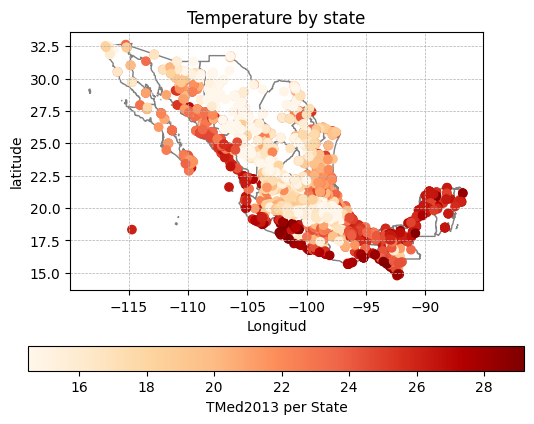

In [66]:
f, ax = plt.subplots()

geo_df.plot(color='white', edgecolor='grey',ax=ax)
intersect2.plot(column='TMed13', figsize=(10,10),
           legend_kwds={'label': "TMed2013 per State", 'orientation': "horizontal"}, legend=True, 
                cmap='OrRd',vmin=14.5, vmax=29.2, ax=ax)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Longitud")
plt.ylabel("latitude")
plt.title("Temperature by state")
plt.savefig("TMed2013")

In [67]:
dfAñoMes2013.to_csv('TempMexLonLat2013.csv',index=False)